In [26]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [27]:
def load_images(folder_path, label, img_size=64, max_images=200):
    data = []
    count = 0
    
    for img_name in os.listdir(folder_path):
        if count >= max_images:
            break
        
        img_path = os.path.join(folder_path, img_name)
        
        try:
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (img_size, img_size))
            img = img.flatten()
            
            data.append([img, label])
            count += 1
        except:
            pass
    
    return data


In [28]:
train_cats = "../data/dataset/train/cats"
train_dogs = "../data/dataset/train/dogs"

val_cats = "../data/dataset/validation/cats"
val_dogs = "../data/dataset/validation/dogs"

test_cats = "../data/dataset/test/cats"
test_dogs = "../data/dataset/test/dogs"


In [29]:
train_data = []
train_data += load_images(train_cats, label=0)
train_data += load_images(train_dogs, label=1)

len(train_data)


400

In [30]:
val_data = []
val_data += load_images(val_cats, label=0)
val_data += load_images(val_dogs, label=1)

len(val_data)


400

In [31]:
test_data = []
test_data += load_images(test_cats, label=0)
test_data += load_images(test_dogs, label=1)

len(test_data)


400

In [32]:
import random

random.shuffle(train_data)
random.shuffle(val_data)
random.shuffle(test_data)


In [33]:
X_train = np.array([item[0] for item in train_data])
y_train = np.array([item[1] for item in train_data])

X_val = np.array([item[0] for item in val_data])
y_val = np.array([item[1] for item in val_data])

X_test = np.array([item[0] for item in test_data])
y_test = np.array([item[1] for item in test_data])


In [34]:
X_train.shape, X_val.shape, X_test.shape


((400, 4096), (400, 4096), (400, 4096))

In [35]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [36]:
y_val_pred = svm_model.predict(X_val)


In [37]:
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)


Validation Accuracy: 0.52


In [38]:
print(classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

           0       0.52      0.60      0.56       200
           1       0.52      0.43      0.48       200

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.52      0.52      0.52       400



In [39]:
y_test_pred = svm_model.predict(X_test)


In [40]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.565


In [41]:
print(classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

           0       0.52      0.60      0.56       200
           1       0.52      0.43      0.48       200

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.52      0.52      0.52       400



In [42]:
y_test_pred = svm_model.predict(X_test)


In [43]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.565


In [44]:
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.55      0.66      0.60       200
           1       0.58      0.47      0.52       200

    accuracy                           0.56       400
   macro avg       0.57      0.56      0.56       400
weighted avg       0.57      0.56      0.56       400



In [54]:
import pandas as pd

results = pd.DataFrame({
    "Actual_Label": y_test,
    "Predicted_Label": y_test_pred
})

results.to_csv("../outputs/svm_test_results.csv", index=False)


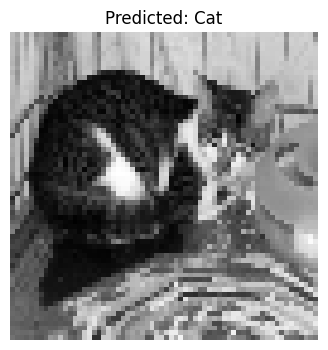

In [53]:
import matplotlib.pyplot as plt

sample_img = X_test[100].reshape(64, 64)

pred_label = y_test_pred[0]
label_name = "Dog" if pred_label == 1 else "Cat"

plt.figure(figsize=(4, 4))
plt.imshow(sample_img, cmap='gray')
plt.title(f"Predicted: {label_name}")
plt.axis('off')

plt.savefig("../figures/sample_dog_cat_prediction.png")
plt.show()
